In [4]:
using DataFrames
Pkg.add("Gadfly")
using Gadfly

set_default_plot_size(20cm, 12cm)

INFO: Pkg operations are not possible on JuliaBox. Please use the "Packages" menu at the top of the main screen.


In [25]:
df = readtable("CalculationTime.csv")
dfVector = df[df[:Type] .== 0, :]
dfMatrix = df[df[:Type] .== 1, :]

,Type,VectorSize,ClockTime
1,1,500,453
2,1,1000,1703
3,1,1500,3915
4,1,2000,6785
5,1,2500,10522
6,1,3000,15189
7,1,3500,20614
8,1,4000,26826
9,1,4500,33973
10,1,5000,41955


In [26]:
dfMeanVector = by(dfVector, :VectorSize, dfVector -> DataFrame(MeanClockTime = mean(dfVector[:ClockTime]), AberrationClockTime = std(dfVector[:ClockTime])))

,VectorSize,MeanClockTime,AberrationClockTime
1,500,4.9,9.194805296712076
2,1000,2.6,1.8973665961010275
3,1500,3.6,2.988868236194653
4,2000,4.7,3.653004851412662
5,2500,5.8,4.661902329879224
6,3000,6.8,5.3499740393970345
7,3500,7.5,5.461989869391313
8,4000,8.5,6.168918507773916
9,4500,9.6,6.834552736727628
10,5000,10.8,7.465476095557024


In [27]:
dfMeanMatrix = by(dfMatrix, :VectorSize, dfMatrix -> DataFrame(MeanClockTime = mean(dfMatrix[:ClockTime]), AberrationClockTime = std(dfMatrix[:ClockTime])))

,VectorSize,MeanClockTime,AberrationClockTime
1,500,420.7,12.858633070604528
2,1000,2167.4,351.1619442808561
3,1500,3831.2,61.53011909264889
4,2000,6787.7,62.90742757770695
5,2500,10598.7,95.617350819701
6,3000,15266.5,283.5278743890194
7,3500,20643.8,162.00123456319707
8,4000,26941.8,257.78319917670694
9,4500,34333.3,534.3685889803862
10,5000,42082.9,340.04197453321035


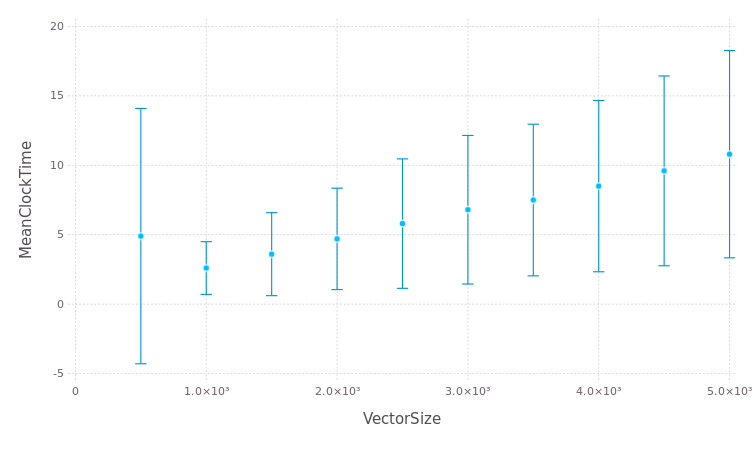

In [28]:
pVector = plot(dfMeanVector, x = :VectorSize, y = :MeanClockTime, ymin = dfMeanVector[:MeanClockTime]-dfMeanVector[:AberrationClockTime], ymax = dfMeanVector[:MeanClockTime] + dfMeanVector[:AberrationClockTime],
     Geom.point, Geom.errorbar)

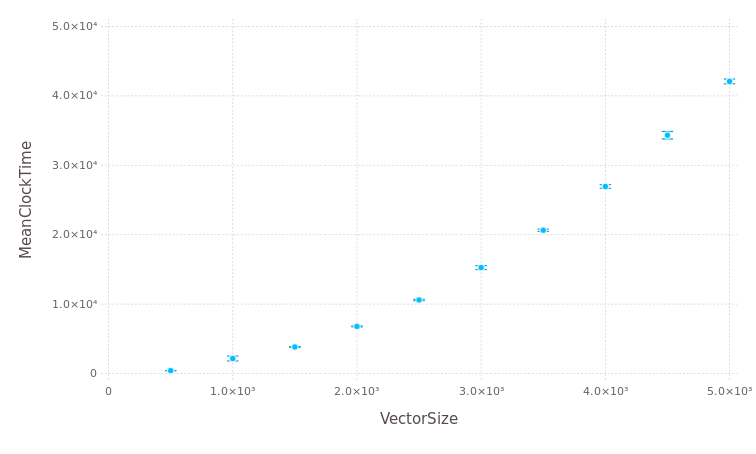

In [29]:
pMatrix = plot(dfMeanMatrix, x = :VectorSize, y = :MeanClockTime, ymin = dfMeanMatrix[:MeanClockTime]-dfMeanMatrix[:AberrationClockTime], ymax = dfMeanMatrix[:MeanClockTime] + dfMeanMatrix[:AberrationClockTime],
     Geom.point, Geom.errorbar)

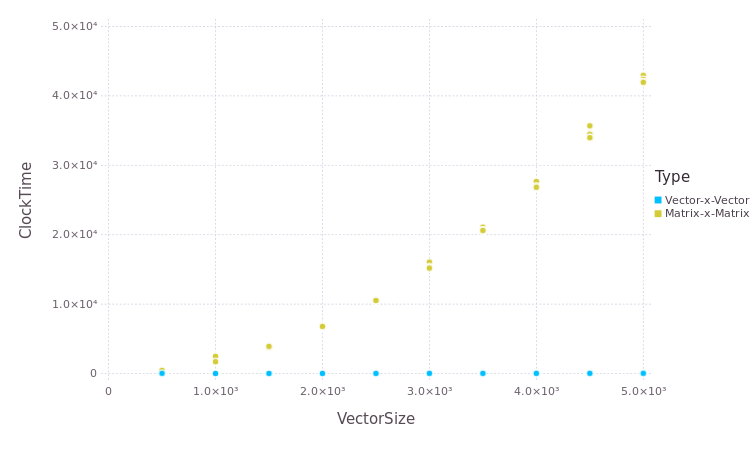

In [30]:
df[:Type]= ifelse.(df[:Type].== 0, "Vector-x-Vector", "Matrix-x-Matrix")
pVectorMatrix = plot(df[1:200,:], x = "VectorSize", y = "ClockTime", color = "Type")

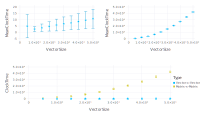

In [31]:
vstack(hstack(pVector, pMatrix), pVectorMatrix)